In [1]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
# import libraries
import numpy as np # linear algebra
import pandas as pd 
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

from keras.models import Sequential
from keras.layers import Dense

In [20]:
df = pd.read_csv("./raw_sales.csv")[['datesold', 'price']]
df.set_index('datesold', inplace=True)
df.head()

,price
datesold,
2007-02-07 00:00:00,525000
2007-02-27 00:00:00,290000
2007-03-07 00:00:00,328000
2007-03-09 00:00:00,380000
2007-03-21 00:00:00,310000


In [21]:
# split into train set and test set
train, test = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]

## In DNN, there should be a y for each X, but a single time-series only has 'X'. The way of dealing with this situation is to convert each x point as the y for $win$ previous x points

In [28]:
# data pre-processing
def X2Xy(X_arr, win):
    X, Y = [], []
    for i in range(len(X_arr) - win):
        X.append(X_arr[i:i+win])
        Y.append(X_arr[i+win])
    return np.array(X), np.array(Y)

trainX, trainY = X2Xy(train['price'].values, win=30)
testX, testY = X2Xy(test['price'].values, win=30)

In [32]:
model=Sequential()
model.add(Dense(units=32, input_dim=30, activation='relu')) # input_dim is the dim of 1-D X
model.add(Dense(8, activation='relu'))
model.add(Dense(1)) # = dim of y
model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])

history=model.fit(trainX,trainY, epochs=100, 
                  batch_size=30, verbose=1, 
                  validation_data=(testX,testY),
                  shuffle=False)

Train on 23634 samples, validate on 5886 samples
Epoch 1/100
23634/23634 [==============================] - 4s 153us/step - loss: 77080743279.7197 - mse: 77080723456.0000 - mae: 169440.0625 - val_loss: 34515279987.3435 - val_mse: 34515275776.0000 - val_mae: 119657.3281
Epoch 2/100
23634/23634 [==============================] - 4s 148us/step - loss: 59911442619.8568 - mse: 59911417856.0000 - mae: 130880.1328 - val_loss: 34159740421.2192 - val_mse: 34159742976.0000 - val_mae: 116335.7734
Epoch 3/100
23634/23634 [==============================] - 3s 143us/step - loss: 58273962769.8401 - mse: 58273947648.0000 - mae: 124106.0234 - val_loss: 33991191931.9552 - val_mse: 33991198720.0000 - val_mae: 115800.4844
Epoch 4/100
23634/23634 [==============================] - 3s 146us/step - loss: 57641170592.4631 - mse: 57641222144.0000 - mae: 121792.1250 - val_loss: 33846555853.1131 - val_mse: 33846562816.0000 - val_mae: 115493.0312
Epoch 5/100
23634/23634 [==============================] - 3s 146us

Epoch 38/100
23634/23634 [==============================] - 4s 150us/step - loss: 54312097383.9208 - mse: 54312050688.0000 - mae: 114405.1484 - val_loss: 33896275599.5270 - val_mse: 33896292352.0000 - val_mae: 115002.8906
Epoch 39/100
23634/23634 [==============================] - 3s 144us/step - loss: 54342025488.5565 - mse: 54342041600.0000 - mae: 114510.6719 - val_loss: 33930083641.6718 - val_mse: 33930092544.0000 - val_mae: 114842.2344
Epoch 40/100
23634/23634 [==============================] - 3s 145us/step - loss: 54261995372.3564 - mse: 54262001664.0000 - mae: 114437.9375 - val_loss: 33973757564.7380 - val_mse: 33973760000.0000 - val_mae: 115233.5312
Epoch 41/100
23634/23634 [==============================] - 3s 146us/step - loss: 54218157861.3212 - mse: 54218174464.0000 - mae: 114239.3750 - val_loss: 34102330255.2661 - val_mse: 34102331392.0000 - val_mae: 115804.0859
Epoch 42/100
23634/23634 [==============================] - 3s 143us/step - loss: 54107310426.5814 - mse: 541073

Epoch 75/100
23634/23634 [==============================] - 4s 165us/step - loss: 53313557310.8139 - mse: 53313548288.0000 - mae: 113462.0625 - val_loss: 34361225043.2457 - val_mse: 34361221120.0000 - val_mae: 115642.3594
Epoch 76/100
23634/23634 [==============================] - 4s 163us/step - loss: 53108718301.9122 - mse: 53108682752.0000 - mae: 113087.9219 - val_loss: 34450417926.5240 - val_mse: 34450423808.0000 - val_mae: 116551.3359
Epoch 77/100
23634/23634 [==============================] - 4s 164us/step - loss: 53157827307.7553 - mse: 53157801984.0000 - mae: 113355.9297 - val_loss: 34321879596.8848 - val_mse: 34321885184.0000 - val_mae: 115186.8906
Epoch 78/100
23634/23634 [==============================] - 4s 160us/step - loss: 53203198472.3514 - mse: 53203218432.0000 - mae: 113377.3984 - val_loss: 34347212917.4312 - val_mse: 34347214848.0000 - val_mae: 115622.1562
Epoch 79/100
23634/23634 [==============================] - 4s 161us/step - loss: 53239810585.5090 - mse: 532397

In [33]:
def model_loss(history):
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(loc='upper right')
    plt.show()

Train Root Mean Squared Error(RMSE): 232504.37; Train Mean Absolute Error(MAE) : 120791.92 
Test Root Mean Squared Error(RMSE): 185219.11; Test Mean Absolute Error(MAE) : 114174.24 


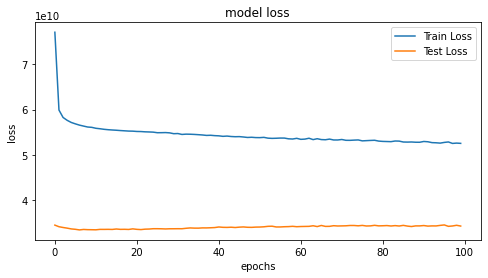

In [34]:
train_score = model.evaluate(trainX, trainY, verbose=0)
print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(train_score[1]), train_score[2]))
test_score = model.evaluate(testX, testY, verbose=0)
print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(test_score[1]), test_score[2]))
model_loss(history)

In [38]:
 def prediction_plot(testY, test_predict):
        len_prediction=[x for x in range(len(testY))]
        plt.figure(figsize=(8,4))
        plt.plot(len_prediction, testY, marker='.', label="actual")
        plt.plot(len_prediction, test_predict, 'r', label="prediction")
        plt.tight_layout()
        sns.despine(top=True)
        plt.subplots_adjust(left=0.07)
        plt.ylabel('Ads Daily Spend', size=15)
        plt.xlabel('Time step', size=15)
        plt.legend(fontsize=15)
        plt.show()

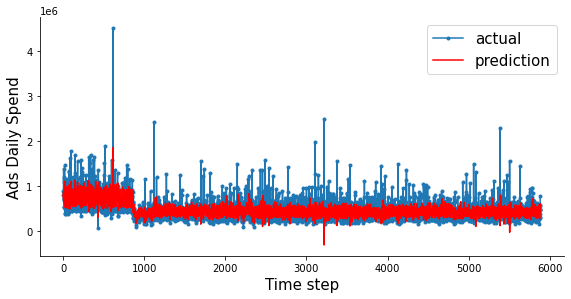

In [39]:
test_predict= model.predict(testX)
prediction_plot(testY, test_predict)